In [1]:
import pymimir
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [2]:
DOMAINS = [
    "blocksworld",
    "ferry",
    "rover",
    "satellite",
]

In [3]:
train_objects = {}
test_objects = {}
bound = {
    "blocksworld": 21,
    "ferry": 25,
    "rover": 16,
    "satellite": 10,
}
for domain_name in DOMAINS:
    domain_pddl = f"datasets/pddl/{domain_name}/domain.pddl"
    domain = pymimir.DomainParser(domain_pddl).parse()
    for dir in ["training", "testing"]:
        objects = []
        problem_dir = f"datasets/pddl/{domain_name}/{dir}"
        for prob in sorted(os.listdir(problem_dir)):
            if not prob.endswith(".pddl"):
                continue
            if prob.startswith("p2_"):
                continue
            if dir == "training":
                num = prob.replace(".pddl", "").replace("p", "")
                num = int(num)
                if num > bound[domain_name]:
                    continue
            problem_pddl = os.path.join(problem_dir, prob)
            problem = pymimir.ProblemParser(problem_pddl).parse(domain)
            objects.append(len(problem.objects))
        if dir == "training":
            train_objects[domain_name] = objects
        else:
            test_objects[domain_name] = objects

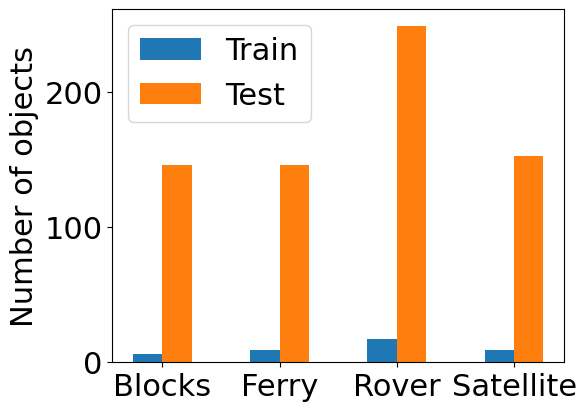

In [5]:
font = {'size'   : 22}
matplotlib.rc('font', **font)

species = ("Blocks", "Ferry", "Rover", "Satellite")
penguin_means = {
    "Train": list(max(train_objects[d]) for d in DOMAINS),
    "Test": list(max(test_objects[d]) for d in DOMAINS),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(5.75, 4), layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier + width * 0.5
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of objects')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left')

# plt.show()
plt.savefig("results/plots/objects.pdf")
tex_path = "/home/dzc/manuscripts/aaai-25-lrnn/figures/"
if os.path.exists(tex_path):
    plt.savefig(tex_path + "objects.pdf")